<a href="https://colab.research.google.com/github/adarsh-kumar-shah/Hotel-Operations-Analysis/blob/main/Hotel_Operations_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Harmony: Data Insights for Optimized Operations


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/hotel_bookings.csv")


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Data Cleaning

In [ ]:
df.isnull().sum()

df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
df['country'] = df['country'].fillna('Unknown')

In [ ]:
# Converting month name to month number
df['arrival_date_month_num'] = pd.to_datetime(
    df['arrival_date_month'], format='%B'
).dt.month

# Ensuring year, month, day are integers
df['arrival_date_year'] = df['arrival_date_year'].astype(int)
df['arrival_date_month_num'] = df['arrival_date_month_num'].astype(int)
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype(int)

# Building proper datetime
df['arrival_date'] = pd.to_datetime(dict(
    year=df['arrival_date_year'],
    month=df['arrival_date_month_num'],
    day=df['arrival_date_day_of_month']
))

df = df.drop(columns=['arrival_date_month_num'])

In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df = df.drop_duplicates()

Number of duplicate rows: 31994


In [ ]:
df['children'] = df['children'].astype(int)

In [ ]:
df['agent'] = df['agent'].astype('Int64')

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
month_map = {m: i for i,m in enumerate(calendar.month_name) if m}
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].map(lambda x: str(month_map.get(x, 0))) + '-' +
    df['arrival_date_day_of_month'].astype(str),
    errors='coerce'
)

df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_guests'] = df['adults'].fillna(0) + df['children'] + df['babies'].fillna(0)
df = df[df['total_guests'] > 0]
df = df[df['adr'] >= 0]

In [ ]:
df.to_csv('hotel_bookings_cleaned.csv', index=False)

**Basic Level Questions with Solution Ideas**

1. What is the average lead time for bookings?


In [ ]:
df['lead_time'].mean()

np.float64(79.96970044365979)

2. What is the distribution of bookings by hotel type?

In [ ]:
df['hotel'].value_counts()

,count
hotel,
City Hotel,53274
Resort Hotel,33955


3. How many bookings were canceled?

In [ ]:
df['is_canceled'].sum()

np.int64(24009)

4. What is the most common arrival month for bookings?

In [ ]:
df['arrival_date_month'].mode()[0]

'August'

5. What is the average number of special requests per booking?

In [ ]:
df['total_of_special_requests'].mean()

np.float64(0.698941865663942)

6. Which country has the highest number of bookings?

In [ ]:
df['country'].value_counts().head(10)

,count
country,
PRT,27355
GBR,10423
FRA,8823
ESP,7244
DEU,5385
ITA,3061
IRL,3015
BEL,2081
BRA,1993


7. What is the average daily rate (ADR) for each hotel type?

In [ ]:
df.groupby('hotel')['adr'].mean()

,adr
hotel,
City Hotel,111.271969
Resort Hotel,99.062622


8. What percentage of guests required car parking spaces?

In [ ]:
(df['required_car_parking_spaces'] > 0).mean()

np.float64(0.08375654885416547)

9. What is the average stay duration in week nights and weekend nights?

In [ ]:
df[['stays_in_week_nights','stays_in_weekend_nights']].mean()

,0
stays_in_week_nights,2.623887
stays_in_weekend_nights,1.004574


10. How many bookings were made through travel agents?

In [ ]:
(df['agent'] != 0).sum()

np.int64(75088)

**Medium Level Questions**

1. What is the cancellation rate for each hotel type?


In [ ]:
df.groupby('hotel')['is_canceled'].mean().sort_values(ascending=False)

,is_canceled
hotel,
City Hotel,0.300991
Resort Hotel,0.234840


2. What is the average ADR per market segment?

In [ ]:
df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)

,adr
market_segment,
Online TA,118.296093
Direct,116.784056
Aviation,100.613628
Offline TA/TO,81.948897
Groups,75.184371
Corporate,68.344298
Undefined,15.000000
Complementary,3.093309


3. What is the relationship between lead time and cancellation rate?

,lead_time
is_canceled,
0,70.183581
1,105.738306


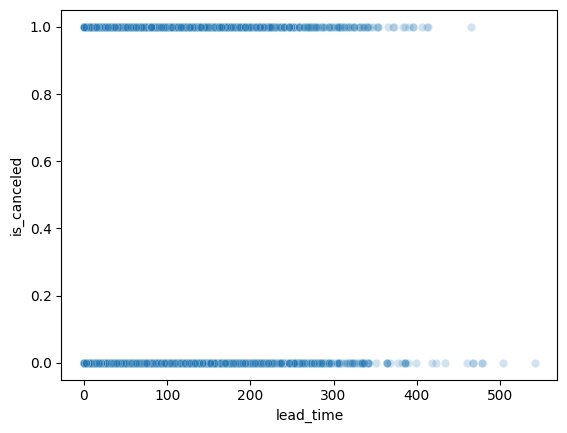

In [ ]:
sns.scatterplot(x='lead_time', y='is_canceled', data=df.sample(5000), alpha=0.2)
df.groupby('is_canceled')['lead_time'].mean()

4. Which distribution channel has the highest number of bookings?

In [ ]:
df['distribution_channel'].value_counts()

,count
distribution_channel,
TA/TO,69028
Direct,12953
Corporate,5062
GDS,181
Undefined,5


5. What is the average number of previous cancellations by hotel type?

In [ ]:
df.groupby('hotel')['previous_cancellations'].mean()

,previous_cancellations
hotel,
City Hotel,0.035759
Resort Hotel,0.022000


6. What is the trend of ADR over the years?

<Axes: xlabel='arrival_date_year'>

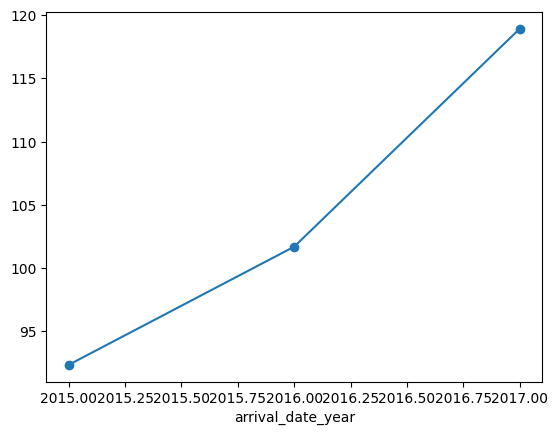

In [ ]:
df.groupby('arrival_date_year')['adr'].mean().plot(marker='o')

7. Which month has the highest revenue?

In [ ]:
df['revenue'] = df['adr'] * df['total_nights']

monthly_rev = df.groupby(df['arrival_date'].dt.to_period('M'))['revenue'].sum()

print(monthly_rev.sort_values(ascending=False).head(5))

arrival_date
2017-08    3131402.33
2017-07    2841704.81
2016-08    2701783.79
2016-07    2093982.77
2017-06    2086028.60
Freq: M, Name: revenue, dtype: float64


8. What is the impact of special requests on ADR?

In [ ]:
df.groupby('total_of_special_requests')['adr'].mean()

,adr
total_of_special_requests,
0,99.889303
1,109.785310
2,118.699924
3,125.232939
4,131.088687
5,129.980000


9. What is the average stay duration for repeated guests versus new guests?

In [ ]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.groupby('is_repeated_guest')['total_nights'].mean()

,total_nights
is_repeated_guest,
0,3.695765
1,1.950045


10. Which room type has the highest number of bookings?

In [ ]:
df['reserved_room_type'].value_counts().head()

,count
reserved_room_type,
A,56435
D,17376
E,6036
F,2820
G,2050


**Advanced Level**

1. What is the impact of booking changes on guest satisfaction as indicated by special requests?

<Axes: xlabel='booking_changes', ylabel='total_of_special_requests'>

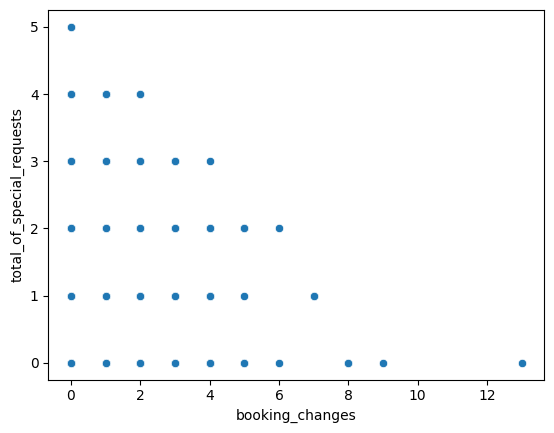

In [ ]:
df[['booking_changes','total_of_special_requests']].corr().iloc[0,1]
sns.scatterplot(x='booking_changes', y='total_of_special_requests', data=df.sample(5000))

2. What is the seasonal impact on booking cancellations?

Text(0.5, 1.0, 'Cancellation rate by month')

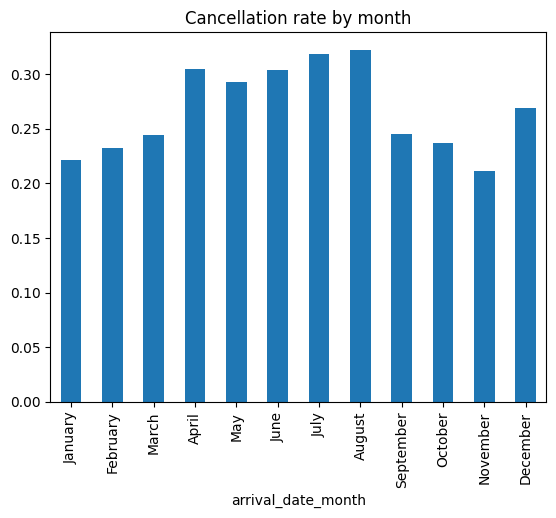

In [ ]:

month_order = list(calendar.month_name)[1:]
cancel_by_month = df.groupby('arrival_date_month')['is_canceled'].mean().reindex(month_order)
cancel_by_month.plot(kind='bar'); plt.title('Cancellation rate by month')

3. How does the booking lead time distribution vary between different market segments?

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Corporate'),
  Text(2, 0, 'Online TA'),
  Text(3, 0, 'Offline TA/TO'),
  Text(4, 0, 'Complementary'),
  Text(5, 0, 'Groups'),
  Text(6, 0, 'Undefined'),
  Text(7, 0, 'Aviation')])

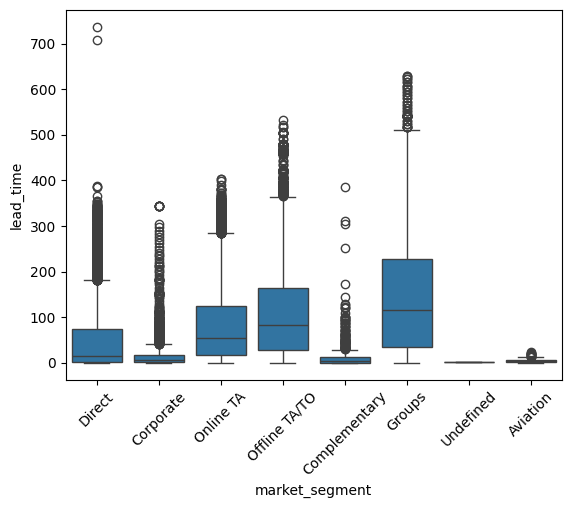

In [ ]:
sns.boxplot(x='market_segment', y='lead_time', data=df);
plt.xticks(rotation=45)